# Exploratory Data Analysis - Building Facade Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('EUI_and_Weather_cleaned.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251782 entries, 0 to 251781
Data columns (total 31 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        251782 non-null  int64  
 1   BLDG_UID          251781 non-null  object 
 2   Building          251781 non-null  object 
 3   Date              251782 non-null  object 
 4   HDD_daily         251782 non-null  float64
 5   CDD_daily         251782 non-null  float64
 6   GHI_sum           251782 non-null  int64  
 7   Avg_Temp_Daily    251782 non-null  float64
 8   Humidity_avg      251782 non-null  float64
 9   Elec_Power        199777 non-null  float64
 10  Thrm_Energy       114030 non-null  float64
 11  Thrm_Power        105562 non-null  float64
 12  Wtr_Cns           174421 non-null  float64
 13  Elec_EUI          193650 non-null  float64
 14  Thrm_EUI          113594 non-null  float64
 15  Wtr_WUI           186816 non-null  float64
 16  Total_EUI_excwtr  11

## EUI Distribution and National Building Code

In [3]:
data['Occu_Date'] = data['Occu_Date']//10000
data['Occu_Date'] = data['Occu_Date'] >= 1970

In [4]:
bldg_yr = data[['Occu_Date', 'Building', 'Total_EUI_excwtr']]
bldg_yr.loc[bldg_yr['Occu_Date'] == True, 'Occu_Date'] = "After 1970"
bldg_yr.loc[bldg_yr['Occu_Date'] == False, 'Occu_Date'] = "Before 1970"
len(bldg_yr)

251782

In [5]:
bldg_yr = bldg_yr.dropna()
bldg_yr['Total_EUI_excwtr'].describe()

count    111331.000000
mean          0.734311
std           0.488344
min           0.000220
25%           0.377033
50%           0.604687
75%           0.971764
max           3.146596
Name: Total_EUI_excwtr, dtype: float64

Text(0.5, 0, 'Total EUI')

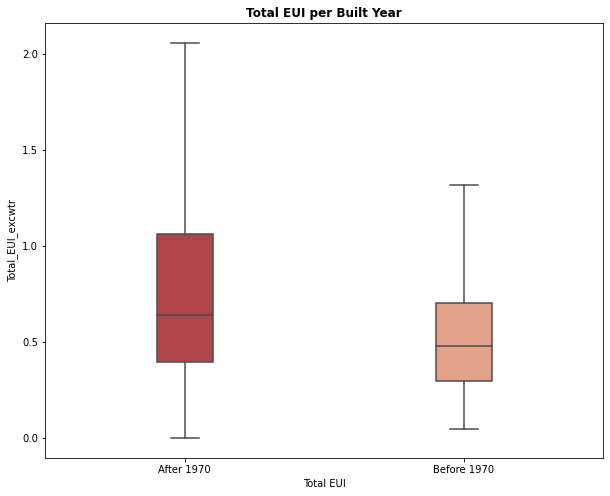

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_palette("RdBu")
sns.boxplot(data=bldg_yr, x='Occu_Date', y='Total_EUI_excwtr', ax=ax, showfliers=False, width=0.2)
plt.title("Total EUI per Built Year", weight="bold")
plt.xlabel("Built Year")
plt.xlabel("Total EUI")

## Construction Type

In [7]:
bldg_list = list(data['Building'].unique())

constr_type = data[['Building', 'Constr_Type']]
constr_type= constr_type.drop_duplicates(subset=['Building']).dropna()
constr_type.head(50)

,Building,Constr_Type
0,AERL,Concrete
3649,Alumni Centre,Concrete
7298,AMS Nest,Concrete
10947,Aquatic Centre,Concrete
14596,Art Students Centre,Concrete
18245,Asian Centre,Concrete
21894,Beaty,Concrete
25543,Bio Sci South,Concrete
29192,Bio Sci West,Concrete
32841,Biomed,Concrete


Text(0.5, 0, 'Relative Frequency')

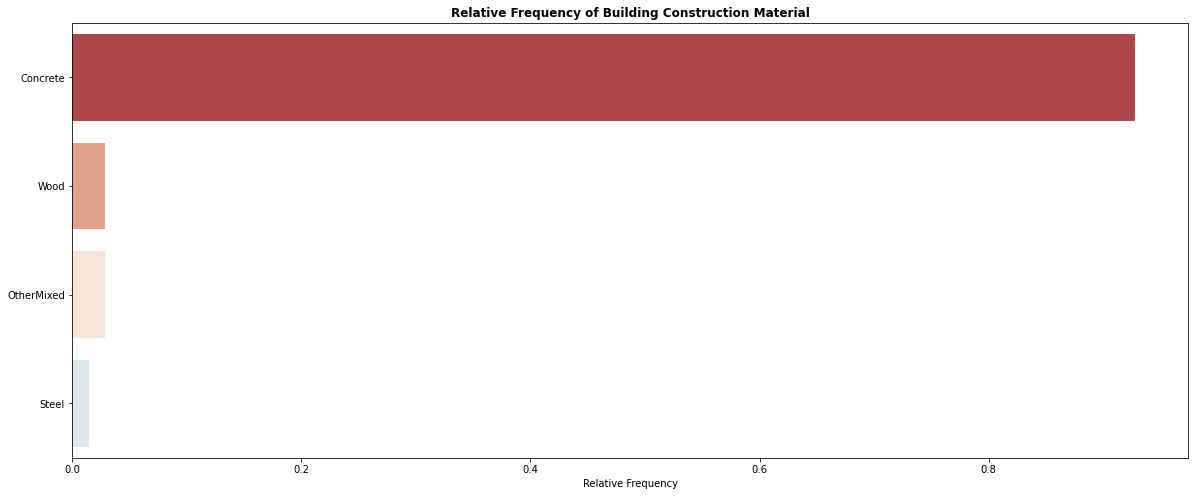

In [8]:
fig, ax = plt.subplots(figsize=(20,8))

# Calculate relative frequencies by dividing the counts by the total number of observations
relative_frequencies = constr_type['Constr_Type'].value_counts(normalize=True)

# Create a bar plot to show relative frequencies
sns.barplot(x=relative_frequencies.values, y=relative_frequencies.index, ax=ax)
plt.title("Relative Frequency of Building Construction Material", weight='bold')
plt.xlabel("Relative Frequency")

## Correlation Matrix

In [9]:
# bldg feature correlation
EUI_params = ['Elec_EUI', 'Thrm_EUI', 'Wtr_WUI']
bldg_feat = ['Occu_Date', 'Constr_Type', 'MAX_Floors', 'FSP_Classroom', 'FSP_Lab', 'FSP_Library', 'FSP_Office',
            'BLDG_Height', 'GFA', 'GBA']
bldg_feat_df = data[EUI_params+bldg_feat]

bldg_feat_df.head()

,Elec_EUI,Thrm_EUI,Wtr_WUI,Occu_Date,Constr_Type,MAX_Floors,FSP_Classroom,FSP_Lab,FSP_Library,FSP_Office,BLDG_Height,GFA,GBA
0,0.229089,NaN,0.001099,True,Concrete,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
1,0.261573,NaN,0.001379,True,Concrete,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
2,0.313268,NaN,0.001714,True,Concrete,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
3,0.308332,NaN,0.001900,True,Concrete,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
4,0.293685,NaN,0.001975,True,Concrete,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0


In [10]:
# Manual label encoding for increasing thermal resistance of material
ordinal_sequence = ['Wood', 'Concrete', 'Steel', 'OtherMixed']

# Create a custom mapping function
def custom_encode(category):
    return ordinal_sequence.index(category)

# Apply the custom mapping function to the DataFrame
bldg_feat_df = bldg_feat_df.dropna(subset=['Constr_Type'])
bldg_feat_df['Constr_Type'] = bldg_feat_df['Constr_Type'].apply(custom_encode)

# Apply integer encoding for Occupation Date
bldg_feat_df.loc[bldg_feat_df['Occu_Date'] == True, 'Occu_Date'] = 1
bldg_feat_df.loc[bldg_feat_df['Occu_Date'] == False, 'Occu_Date'] = 0

In [11]:
bldg_feat_df.head(20)

,Elec_EUI,Thrm_EUI,Wtr_WUI,Occu_Date,Constr_Type,MAX_Floors,FSP_Classroom,FSP_Lab,FSP_Library,FSP_Office,BLDG_Height,GFA,GBA
0,0.229089,NaN,0.001099,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
1,0.261573,NaN,0.001379,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
2,0.313268,NaN,0.001714,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
3,0.308332,NaN,0.001900,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
4,0.293685,NaN,0.001975,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
5,0.290751,NaN,0.002086,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
6,0.209668,NaN,0.001174,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
7,0.213091,NaN,0.001136,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
8,0.298761,NaN,0.002180,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0
9,0.300624,NaN,NaN,1,1,6.0,0.06,0.05,0.0,0.46,19.33,5368.0,5731.0


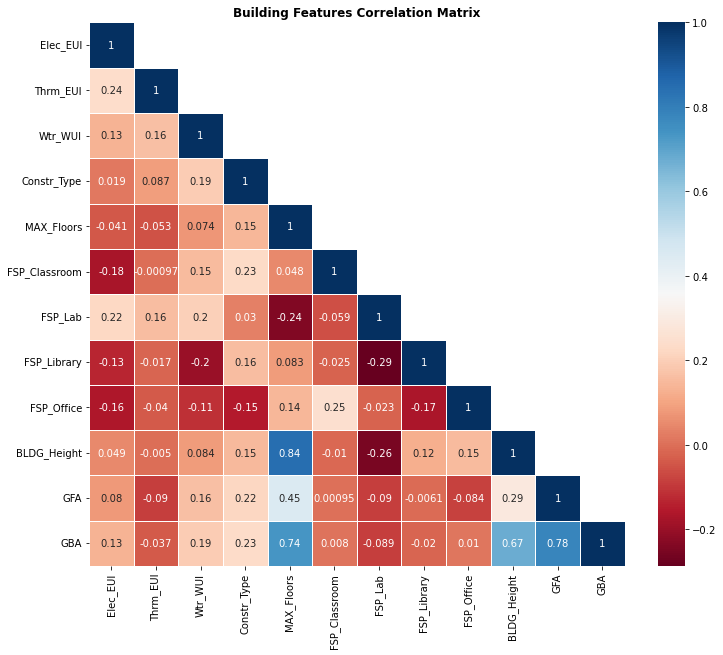

In [18]:
corr_mat = bldg_feat_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_mat, dtype=bool))

# Set the diagonal elements of the mask to False
np.fill_diagonal(mask, False)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
plt.title("Building Features Correlation Matrix", weight="bold")
sns.heatmap(corr_mat, annot=True, cmap='RdBu', linewidths=0.5, mask=mask)

plt.show()
